<a href="https://colab.research.google.com/github/NeshPk/NeshPk/blob/main/FujiDmountain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 【Problem 1 】 Data visualization

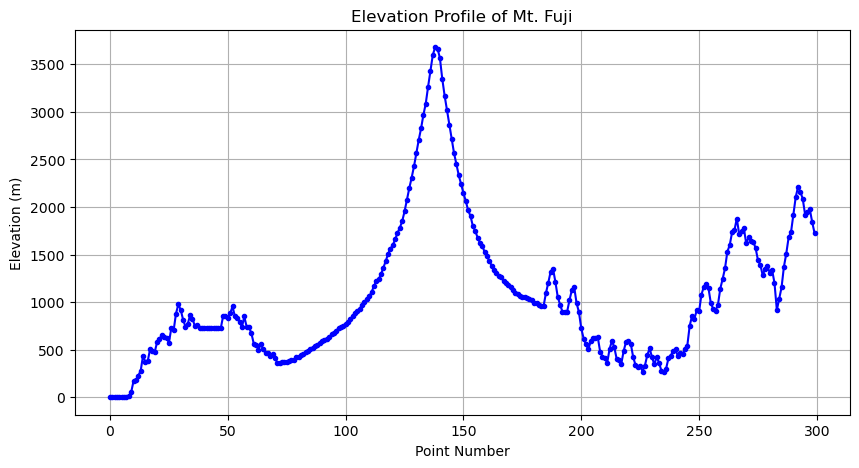

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Extract point numbers and elevations
point_numbers = fuji[:, 0]  # First column
elevations = fuji[:, 3]  # Fourth column

# Plot the elevation profile
plt.figure(figsize=(10, 5))
plt.plot(point_numbers, elevations, marker='o', linestyle='-', color='b', markersize=3)
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Elevation Profile of Mt. Fuji")
plt.grid()
plt.show()


##### 【Problem 2 】 Create a function to calculate the slope of a point

In [ ]:
def calculate_slope(fuji, i):
    """
    Calculate the slope at a given point i using the elevation difference.

    Parameters:
        fuji (numpy array): The Mt. Fuji dataset
        i (int): The index of the current point

    Returns:
        float: The slope at point i
    """
    if i == 0:
        return 0  # No previous point for the first index

    return fuji[i, 3] - fuji[i - 1, 3]  # Elevation difference

# Example usage
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Test with point 100
slope_at_100 = calculate_slope(fuji, 100)
print(f"Slope at point 100: {slope_at_100}")


Slope at point 100: 18.90000000000009


##### 【Problem 3 】 Create a function to calculate the destination of the destination

In [ ]:
def next_point(fuji, current_idx, alpha=0.2):
    """
    Calculate the next point to move based on the slope.

    Parameters:
        fuji (numpy array): The Mt. Fuji dataset
        current_idx (int): The index of the current point
        alpha (float): Learning rate (default: 0.2)

    Returns:
        int: The next point index (rounded and within valid range)
    """
    # Calculate the slope at the current point
    slope = calculate_slope(fuji, current_idx)

    # Compute the next point index
    next_idx = int(round(current_idx - alpha * slope))

    # Ensure next index is within valid bounds
    next_idx = max(0, min(next_idx, len(fuji) - 1))

    return next_idx

# Example usage
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

current_idx = 100  # Starting point
next_idx = next_point(fuji, current_idx)
print(f"Next point from index {current_idx}: {next_idx}")


Next point from index 100: 96


##### 【Problem 4 】 Create a function down the mountain

In [ ]:
def descend_mountain(fuji, start_idx=136, alpha=0.2):
    """
    Perform a descent from a given starting point using the next_point function.

    Parameters:
        fuji (numpy array): The Mt. Fuji dataset
        start_idx (int): The starting point index (default: 136)
        alpha (float): Learning rate (default: 0.2)

    Returns:
        list: A list of indices representing the descent path
    """
    path = [start_idx]  # Store the visited points
    current_idx = start_idx

    while True:
        next_idx = next_point(fuji, current_idx, alpha)  # Get the next point

        if next_idx == current_idx:  # Stop if no movement
            break

        path.append(next_idx)  # Add to path
        current_idx = next_idx  # Update current position

    return path

# Example usage
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

descent_path = descend_mountain(fuji)
print(f"Descent path: {descent_path}")


Descent path: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


##### 【Question 5】Visualization of the downhill process

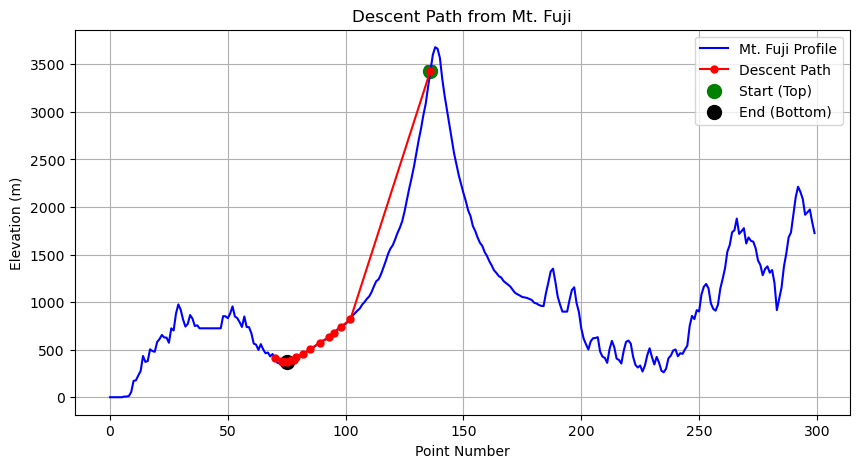

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Perform descent
descent_path = descend_mountain(fuji)

# Extract data for plotting
point_numbers = fuji[:, 0]  # x-axis (point index)
elevations = fuji[:, 3]  # y-axis (elevation)

# Extract descent path coordinates
descent_points = np.array(descent_path)
descent_elevations = fuji[descent_points, 3]

# Plot the full elevation profile
plt.figure(figsize=(10, 5))
plt.plot(point_numbers, elevations, linestyle='-', color='b', label="Mt. Fuji Profile")

# Overlay descent path in red
plt.plot(descent_points, descent_elevations, marker='o', linestyle='-', color='r', markersize=5, label="Descent Path")

# Mark start and end points
plt.scatter(descent_points[0], descent_elevations[0], color='g', s=100, label="Start (Top)")
plt.scatter(descent_points[-1], descent_elevations[-1], color='black', s=100, label="End (Bottom)")

# Labels and title
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Descent Path from Mt. Fuji")
plt.legend()
plt.grid()

# Show the plot
plt.show()


##### 【Problem 6 】 Initial value change

In [ ]:
def test_different_start_points(fuji, start_points, alpha=0.2):
    """
    Test descending from multiple starting points.

    Parameters:
        fuji (numpy array): The Mt. Fuji dataset
        start_points (list of int): List of starting points
        alpha (float): Learning rate (default: 0.2)

    Returns:
        dict: A dictionary mapping start points to their descent paths
    """
    results = {}
    for start in start_points:
        path = descend_mountain(fuji, start, alpha)
        results[start] = path
        print(f"Start: {start}, Descent Path: {path}")

    return results

# Example usage
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Try different starting points
start_points = [50, 80, 100, 136]  # Example start points
descents = test_different_start_points(fuji, start_points)


Start: 50, Descent Path: [50, 54, 58, 80]
Start: 80, Descent Path: [80]
Start: 100, Descent Path: [100, 96, 90, 87, 84, 81, 77, 75]
Start: 136, Descent Path: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


##### 【Problem 7 】 Visualization of lower mountain processes by initial value

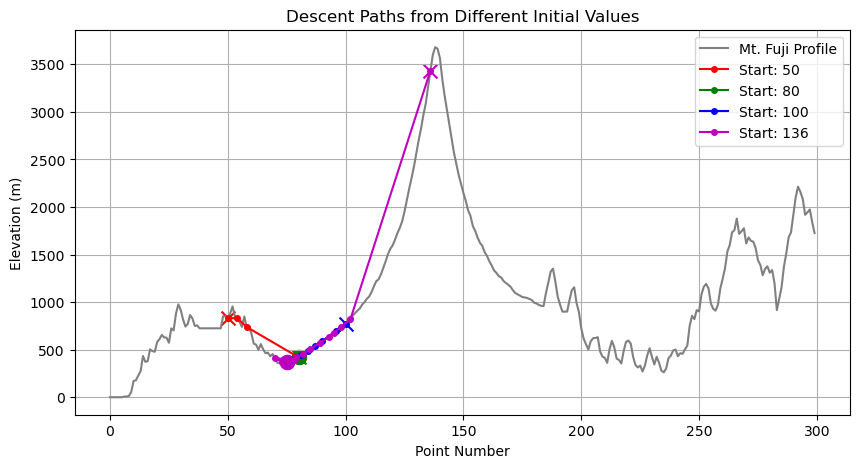

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Define multiple starting points
start_points = [50, 80, 100, 136]  # Example initial values
colors = ['r', 'g', 'b', 'm', 'c', 'orange']  # Different colors for each descent

# Plot the full elevation profile
plt.figure(figsize=(10, 5))
plt.plot(fuji[:, 0], fuji[:, 3], linestyle='-', color='gray', label="Mt. Fuji Profile")

# Loop through each starting point and plot its descent
for i, start in enumerate(start_points):
    descent_path = descend_mountain(fuji, start)
    descent_points = np.array(descent_path)
    descent_elevations = fuji[descent_points, 3]

    # Plot descent path
    plt.plot(descent_points, descent_elevations, marker='o', linestyle='-',
             color=colors[i], markersize=4, label=f"Start: {start}")

    # Mark start and end points
    plt.scatter(descent_points[0], descent_elevations[0], color=colors[i], s=100, marker='x')  # Start
    plt.scatter(descent_points[-1], descent_elevations[-1], color=colors[i], s=100, marker='o')  # End

# Labels, legend, and title
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Descent Paths from Different Initial Values")
plt.legend()
plt.grid()

# Show the plot
plt.show()


##### 【Problem 8 】 (Advance problem) Hyper parameter change

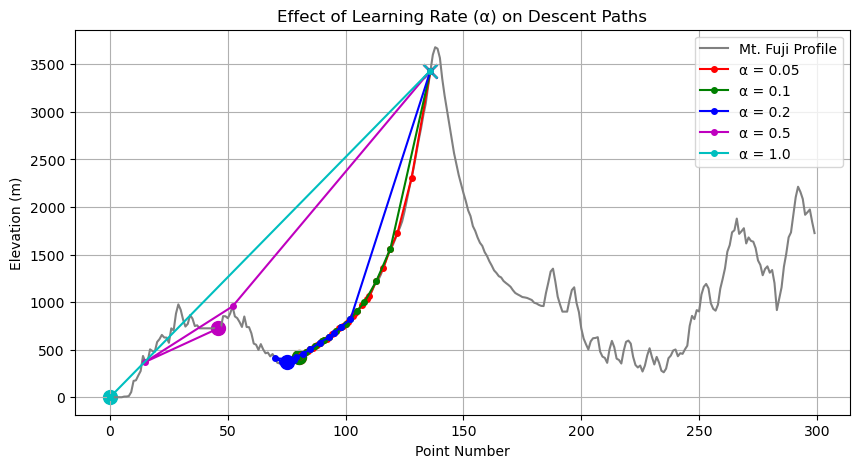

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Define different alpha values to test
alpha_values = [0.05, 0.1, 0.2, 0.5, 1.0]  # Learning rates
colors = ['r', 'g', 'b', 'm', 'c']  # Different colors for each alpha
start_point = 136  # Fixed starting point

# Plot the full elevation profile
plt.figure(figsize=(10, 5))
plt.plot(fuji[:, 0], fuji[:, 3], linestyle='-', color='gray', label="Mt. Fuji Profile")

# Loop through different alpha values and plot descents
for i, alpha in enumerate(alpha_values):
    descent_path = descend_mountain(fuji, start_point, alpha)
    descent_points = np.array(descent_path)
    descent_elevations = fuji[descent_points, 3]

    # Plot descent path
    plt.plot(descent_points, descent_elevations, marker='o', linestyle='-',
             color=colors[i], markersize=4, label=f"α = {alpha}")

    # Mark start and end points
    plt.scatter(descent_points[0], descent_elevations[0], color=colors[i], s=100, marker='x')  # Start
    plt.scatter(descent_points[-1], descent_elevations[-1], color=colors[i], s=100, marker='o')  # End

# Labels, legend, and title
plt.xlabel("Point Number")
plt.ylabel("Elevation (m)")
plt.title("Effect of Learning Rate (α) on Descent Paths")
plt.legend()
plt.grid()

# Show the plot
plt.show()
